# ネットワークの次数分布

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# comment out below
import json


def dict2rc(dict): return {f'{k1}.{k2}': v for k1,
                           d in dict.items() for k2, v in d.items()}


with open('mpl_rc.json') as f:
    plt.rcParams.update(dict2rc(json.load(f)))
plt.style.use('dracula')


In [32]:
path = '../result/ba.csv'
links = pd.read_csv(path, header=None)
display(links.head())

# Calculate degrees
degrees = pd.value_counts(links.values.reshape(-1)).values
print(degrees)


,0,1
0,0,1
1,0,2
2,0,3
3,0,4
4,1,2


[3434 3009 2831 ...    3    3    3]


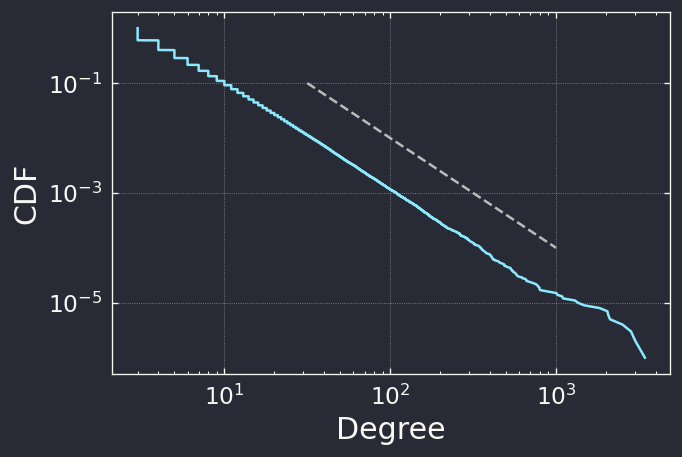

In [46]:
def draw_cdf(xs):
    n = len(xs)
    cdf = [(i+1)/n for i in range(n)]
    plt.plot(sorted(xs, reverse=True), cdf)
    plt.xlabel('Degree')
    plt.ylabel('CDF')
    plt.xscale('log')
    plt.yscale('log')


draw_cdf(degrees)
plt.plot([pow(10, 1.5), pow(10, 3)], [pow(10, -1), pow(10, -4)],
         color='#BBBBBB', linestyle='--')


In [40]:
path = '../result/ba_directed.csv'
links = pd.read_csv(path, header=None)
display(links.head())

# Calculate degrees
outdegs = links[0].value_counts()
indegs = links[1].value_counts()


,0,1
0,0,1
1,1,0
2,0,2
3,2,0
4,0,3


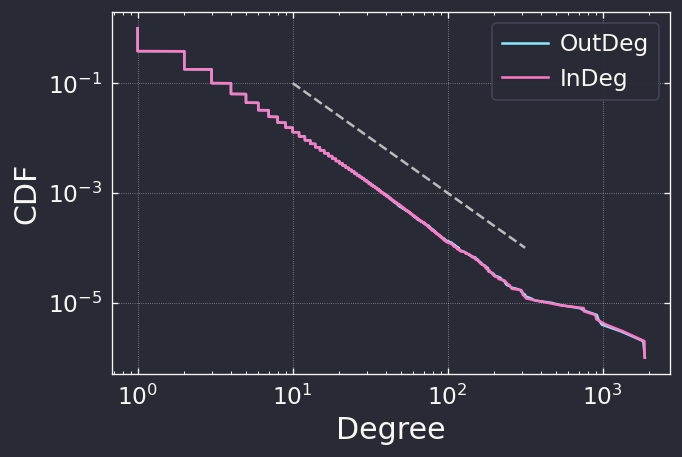

In [44]:
def draw_cdf(xs, label='None'):
    n = len(xs)
    cdf = [(i+1)/n for i in range(n)]
    plt.plot(sorted(xs, reverse=True), cdf, label=label)


draw_cdf(outdegs, label='OutDeg')
draw_cdf(indegs, label='InDeg')
plt.plot([pow(10, 1), pow(10, 2.5)], [pow(10, -1), pow(10, -4)],
         color='#BBBBBB', linestyle='--')

plt.xlabel('Degree')
plt.ylabel('CDF')
plt.xscale('log')
plt.yscale('log')
plt.legend()
